In [116]:
# initial setup
try:
    # settings colab:
    import google.colab
        
except ModuleNotFoundError:    
    # sett local:
    %run "../common/0_notebooks_base_setup2.py"

default checking
Running command `conda list`... ok
jupyterlab=1.2.6 already installed
pandas=1.0.3 already installed
bokeh=2.0.0 already installed
seaborn=0.10.0 already installed
ipywidgets=7.5.1 already installed
pytest=5.3.4 already installed
chardet=3.0.4 already installed
psutil=5.7.0 already installed
scipy=1.4.1 already installed
statsmodels=0.11.0 already installed
scikit-learn=0.23.1 already installed
xlrd=1.2.0 already installed
nltk=3.4.5 already installed
unidecode=1.0.23 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.8.1 already installed
flask=1.0.3 already installed


<Figure size 432x288 with 0 Axes>

---

<img src='../common/logo_DH.png' align='left' width=20%/>

## Desafío n3
### Un modelo de clasificacion.

De acuerdo al conjunto de datos que vamos a analizar, poner a punto un modelo de clasificación que permita determinar y predecir como se organiza la distribución de tipos de inmuebles sobre el suelo de la ciudad.
<br/>Con esta información dar el puntapie para el analisis proyectual que permita la prección de las posibles transformaciones y obtener los datos que fundamenten la ejecución de políticas de promoción de acuerdo a 
objetivos de habitacionales y de desarrollo urbano.

Los datos son recolectados de la web publica de la ciduad.

## IMPORTAMOS LIBRERIAS

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importamos DATAFRAME 1

In [118]:
#DATASET 1 con usos de suelo
data1 = pd.read_csv("DATA/relevamiento-usos-del-suelo-2017.csv", delimiter =",",low_memory=False)
data1.head(3)

,X,Y,SMP,CALLE,NUM,TIPO1_16,TIPO2_16,PISOS_16,NOMBRE,OBSERVACIO,BARRIO,COMUNA,5_DIG,4_DIG,3_DIG,2_DIG,RAMA,SUBRAMA,SSRAMA
0,-58.455634,-34.596891,047-040A-001C,MONTENEGRO,124,E,VIVIENDA,1,NaN,NaN,CHACARITA,15.0,3,0,0,0,EDIFICIOS,VIVIENDA,NaN
1,-58.455699,-34.596945,047-040A-002,NUEVA ZELANDIA,4820,EP,METALURGIA,1,RODOCA S.A.,NaN,CHACARITA,15.0,28900,2890,289,28,"FABRICACIÓN DE PRODUCTOS ELABORADOS DE METAL, ...",FABRICACIÓN DE PRODUCTOS ELABORADOS DE METAL NCP,NaN
2,-58.455750,-34.597013,047-040A-003,NUEVA ZELANDIA,4830,E,CASA,1,NaN,E X GAP,CHACARITA,15.0,4,0,0,0,EDIFICIOS,CASA,NaN


In [119]:
#Exploramos datos
data1.shape,
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561722 entries, 0 to 561721
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   X           561722 non-null  float64
 1   Y           561722 non-null  float64
 2   SMP         561722 non-null  object 
 3   CALLE       561722 non-null  object 
 4   NUM         561722 non-null  int64  
 5   TIPO1_16    561722 non-null  object 
 6   TIPO2_16    561722 non-null  object 
 7   PISOS_16    561722 non-null  int64  
 8   NOMBRE      23057 non-null   object 
 9   OBSERVACIO  19071 non-null   object 
 10  BARRIO      561722 non-null  object 
 11  COMUNA      561722 non-null  float64
 12  5_DIG       561722 non-null  int64  
 13  4_DIG       561722 non-null  int64  
 14  3_DIG       561722 non-null  int64  
 15  2_DIG       561722 non-null  int64  
 16  RAMA        561721 non-null  object 
 17  SUBRAMA     560938 non-null  object 
 18  SSRAMA      225463 non-null  object 
dtypes:

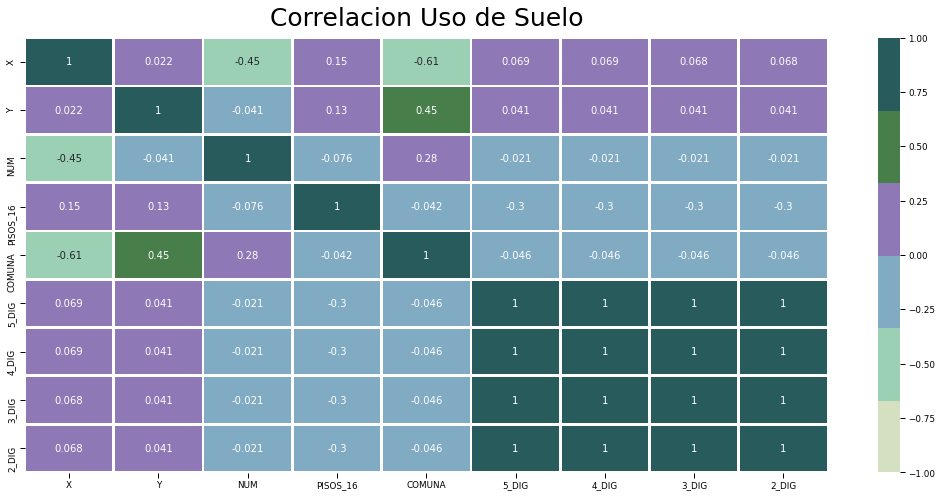

In [120]:
#VISUALIZAMOS ESTA PORQUE TIENE NUESTRO Y A PREDIT
plt.figure(figsize=(18, 8))
sequential_colors = sns.color_palette("ch:-225.5,144.2,dark=.3")
heatmap = sns.heatmap(data1.corr(), vmin=-1, vmax=1, annot=True,linewidths=1.8,cmap=sequential_colors)# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.heatmap;
heatmap.set_title('Correlacion Uso de Suelo', fontdict={'fontsize':25}, pad=12);


In [121]:
#REVISO el contenido de mis etiquetas para determinar mi columna Y
len(data1.TIPO1_16.unique()), len(data1.TIPO2_16.unique()), len(data1.RAMA.unique())

(13, 743, 84)

In [122]:
data1 = data1.drop(['CALLE', 'NUM', 'TIPO1_16', 'PISOS_16', 'NOMBRE', 'OBSERVACIO','5_DIG', '4_DIG', '3_DIG', '2_DIG','SUBRAMA', 'SSRAMA'], axis=1)
data1.head()

,X,Y,SMP,TIPO2_16,BARRIO,COMUNA,RAMA
0,-58.455634,-34.596891,047-040A-001C,VIVIENDA,CHACARITA,15.0,EDIFICIOS
1,-58.455699,-34.596945,047-040A-002,METALURGIA,CHACARITA,15.0,"FABRICACIÓN DE PRODUCTOS ELABORADOS DE METAL, ..."
2,-58.455750,-34.597013,047-040A-003,CASA,CHACARITA,15.0,EDIFICIOS
3,-58.455810,-34.597074,047-040A-004,GARAGE PRIVADO,CHACARITA,15.0,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE
4,-58.455879,-34.597129,047-040A-005,GARAGE PRIVADO,CHACARITA,15.0,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE


In [123]:
#TRAEMOS DATA2 CON DATOS DE SUPERFICIE Y AREA
data2 = pd.read_csv("DATA/parcelas.csv", delimiter =",",low_memory=False)
data2.head(3)

,gid,fid_1,featid1,manzana,obs,parcela,seccion,smp,partida,sup_edif,unidades,fid_2,barrios,comuna,area,perimeter,acres,dist_m2,hectares
0,15085047,NaN,NaN,098,INFORMACION CONSISTENTE,029a,67,067-098-029a,237031.0,385.0,0,NaN,VILLA GRAL. MITRE,11,209.7,NaN,NaN,NaN,NaN
1,15085048,NaN,NaN,031A,INFORMACION CONSISTENTE,017,67,067-031A-017,250532.0,1536.0,25,NaN,VILLA SANTA RITA,11,173.4,NaN,NaN,NaN,NaN
2,15085049,NaN,NaN,018A,INFORMACION CONSISTENTE,018,67,067-018A-018,251115.0,183.0,2,NaN,VILLA SANTA RITA,11,103.8,NaN,NaN,NaN,NaN


In [124]:
data2.shape,
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318269 entries, 0 to 318268
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   gid        318269 non-null  int64  
 1   fid_1      0 non-null       float64
 2   featid1    0 non-null       float64
 3   manzana    318269 non-null  object 
 4   obs        318189 non-null  object 
 5   parcela    318269 non-null  object 
 6   seccion    318269 non-null  int64  
 7   smp        318269 non-null  object 
 8   partida    318171 non-null  float64
 9   sup_edif   312576 non-null  float64
 10  unidades   312583 non-null  object 
 11  fid_2      0 non-null       float64
 12  barrios    318192 non-null  object 
 13  comuna     318269 non-null  int64  
 14  area       318268 non-null  float64
 15  perimeter  0 non-null       float64
 16  acres      0 non-null       float64
 17  dist_m2    0 non-null       float64
 18  hectares   0 non-null       float64
dtypes: float64(10), int64(3

In [125]:
#FILTRAMOS
data2 = data2.drop(['gid', 'fid_1', 'featid1', 'manzana', 'obs', 'parcela', 'seccion','partida', 'unidades','fid_2', 'barrios', 'comuna', 'perimeter', 'acres', 'dist_m2', 'hectares'],axis=1)

In [126]:
#MIRAMOS
data2.head(), data2.columns

(            smp  sup_edif   area
 0  067-098-029a     385.0  209.7
 1  067-031A-017    1536.0  173.4
 2  067-018A-018     183.0  103.8
 3  067-031A-018     281.0  302.9
 4  067-018A-019     140.0  155.8,
 Index(['smp', 'sup_edif', 'area'], dtype='object'))

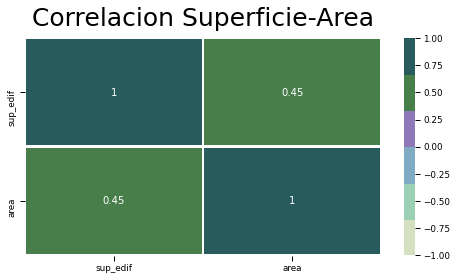

In [127]:
#VISUALIZAMOS
plt.figure(figsize=(8, 4))
sequential_colors = sns.color_palette("ch:-225.5,144.2,dark=.3")
heatmap = sns.heatmap(data2.corr(), vmin=-1, vmax=1, annot=True,linewidths=1.8,cmap=sequential_colors)# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.heatmap;
heatmap.set_title('Correlacion Superficie-Area', fontdict={'fontsize':25}, pad=12);

In [128]:
#RENOMBRAMOS
data2.columns=["SMP",'sup_edif', 'area']
data2.head()

,SMP,sup_edif,area
0,067-098-029a,385.0,209.7
1,067-031A-017,1536.0,173.4
2,067-018A-018,183.0,103.8
3,067-031A-018,281.0,302.9
4,067-018A-019,140.0,155.8


In [129]:
#CHEQUEAMOS
datadup= data1["SMP"]
datadup2=data2["SMP"] 
def checkIfDuplicates_1(datadup):
    if len(datadup) == len(set(datadup2)):
        return False
    else:
        return True
checkIfDuplicates_1(datadup)

True

In [130]:
#LIMPIAMOS NANS
data1.dropna(inplace=True)
data2.dropna(inplace=True)

In [131]:
#MERGEAMOS DATAFRAME
data_m1= pd.merge(left=data1,right=data2, left_on='SMP', right_on='SMP')
data_m1.head(3)

,X,Y,SMP,TIPO2_16,BARRIO,COMUNA,RAMA,sup_edif,area
0,-58.455699,-34.596945,047-040A-002,METALURGIA,CHACARITA,15.0,"FABRICACIÓN DE PRODUCTOS ELABORADOS DE METAL, ...",134.0,122.8
1,-58.455750,-34.597013,047-040A-003,CASA,CHACARITA,15.0,EDIFICIOS,151.0,148.8
2,-58.455810,-34.597074,047-040A-004,GARAGE PRIVADO,CHACARITA,15.0,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE,270.0,161.6


In [132]:
data_m1.shape

(418603, 9)

In [133]:
#REVISO
data_m1.isnull().sum()

X           0
Y           0
SMP         0
TIPO2_16    0
BARRIO      0
COMUNA      0
RAMA        0
sup_edif    0
area        0
dtype: int64

In [134]:
#REVISO CONLUMNAS DEL MERGE
data_m1.columns 

Index(['X', 'Y', 'SMP', 'TIPO2_16', 'BARRIO', 'COMUNA', 'RAMA', 'sup_edif',
       'area'],
      dtype='object')

In [135]:
#RENOMBRO & REORDENO
data_m1.columns = ['LONG', 'LAT', 'SMP', 'PREDICT', 'BARRIO','COMUNA', 'RAMA','SUP_EDIF', 'AREA']
data_m1.head(3)

,LONG,LAT,SMP,PREDICT,BARRIO,COMUNA,RAMA,SUP_EDIF,AREA
0,-58.455699,-34.596945,047-040A-002,METALURGIA,CHACARITA,15.0,"FABRICACIÓN DE PRODUCTOS ELABORADOS DE METAL, ...",134.0,122.8
1,-58.455750,-34.597013,047-040A-003,CASA,CHACARITA,15.0,EDIFICIOS,151.0,148.8
2,-58.455810,-34.597074,047-040A-004,GARAGE PRIVADO,CHACARITA,15.0,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE,270.0,161.6


In [136]:
# REEINDEXO
data_m1 = data_m1.reindex(columns=['SMP', 'LAT', 'LONG', 'COMUNA','BARRIO', 'RAMA','SUP_EDIF', 'AREA','PREDICT'])
data_m1

,SMP,LAT,LONG,COMUNA,BARRIO,RAMA,SUP_EDIF,AREA,PREDICT
0,047-040A-002,-34.596945,-58.455699,15.0,CHACARITA,"FABRICACIÓN DE PRODUCTOS ELABORADOS DE METAL, ...",134.0,122.8,METALURGIA
1,047-040A-003,-34.597013,-58.455750,15.0,CHACARITA,EDIFICIOS,151.0,148.8,CASA
2,047-040A-004,-34.597074,-58.455810,15.0,CHACARITA,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE,270.0,161.6,GARAGE PRIVADO
3,047-040A-011,-34.597506,-58.455949,15.0,CHACARITA,VENTA Y REP. DE VEHICULOS AUTOMOTORES,292.0,146.0,REPUESTOS AUTOMOTOR (VENTA)
4,047-040A-011,-34.597506,-58.455949,15.0,CHACARITA,VENTA Y REP. DE VEHICULOS AUTOMOTORES,292.0,146.0,REPUESTOS AUTOMOTOR (VENTA)
...,...,...,...,...,...,...,...,...,...
418598,064-099D-008,-34.662933,-58.470553,8.0,VILLA LUGANO,OTROS,0.0,204.7,OTROS
418599,064-099D-010,-34.662779,-58.470347,8.0,VILLA LUGANO,OTROS,0.0,72.3,OTROS
418600,064-099D-012,-34.662678,-58.470241,8.0,VILLA LUGANO,OTROS,0.0,73.1,OTROS
418601,064-099D-009,-34.662748,-58.470480,8.0,VILLA LUGANO,OTROS,0.0,6.9,OTROS


In [137]:
#TRAEMOS DATA3 CON DATOS poblacion
data3 = pd.read_csv("DATA/Densidad - 2019.csv", delimiter =",",low_memory=False)
data3.head(3)

,comuna,poblacion total,densidad
0,1,255.457,14.4
1,2,149.510,23.7
2,3,193.115,30.2


In [138]:
#TYPE 
data3.comuna.astype(float)
data3.columns = ['COMUNA', 'PTCOM','DCOM']
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   COMUNA  15 non-null     int64  
 1   PTCOM   15 non-null     float64
 2   DCOM    15 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 488.0 bytes


In [139]:
#data_m1.info()

In [140]:
#MERGEAMOS DATAFRAME VERSION 2
data_m2= pd.merge(left=data_m1,right=data3, left_on='COMUNA', right_on='COMUNA')
data_m2.sample(3)

,SMP,LAT,LONG,COMUNA,BARRIO,RAMA,SUP_EDIF,AREA,PREDICT,PTCOM,DCOM
0,047-040A-002,-34.596945,-58.455699,15.0,CHACARITA,"FABRICACIÓN DE PRODUCTOS ELABORADOS DE METAL, ...",134.0,122.8,METALURGIA,182.445,12.7
196651,012-010-023,-34.616672,-58.389885,1.0,MONTSERRAT,EDIFICIOS,626.0,143.6,VIVIENDA,255.457,14.4
224982,024-086-030,-34.631523,-58.396400,4.0,PARQUE PATRICIOS,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE,143.0,94.7,GARAGE PRIVADO,239.712,11.1


In [141]:
#TRAEMOS DATA4 CON DATOS superficie edificacble
data4 = pd.read_csv("DATA/superficie_edificable.csv", delimiter =",",low_memory=False)
data4.drop(["tipo","fuente", "id","edificabil"], axis=1,inplace=True)
data4.head(3)
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005307 entries, 0 to 1005306
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   smp         1005307 non-null  object 
 1   altura_ini  1005307 non-null  float64
 2   altura_fin  1005307 non-null  float64
dtypes: float64(2), object(1)
memory usage: 23.0+ MB


In [142]:
data4.columns = ['SMP', 'ALTI','ALTF']
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005307 entries, 0 to 1005306
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SMP     1005307 non-null  object 
 1   ALTI    1005307 non-null  float64
 2   ALTF    1005307 non-null  float64
dtypes: float64(2), object(1)
memory usage: 23.0+ MB


In [143]:
#MERGEAMOS DATAFRAME VERSION 3
data_merged= pd.merge(left=data_m2,right=data4, left_on='SMP', right_on='SMP')
data_merged.sample(3)

,SMP,LAT,LONG,COMUNA,BARRIO,RAMA,SUP_EDIF,AREA,PREDICT,PTCOM,DCOM,ALTI,ALTF
498096,057-004-021,-34.622988,-58.458346,7.0,FLORES,EDIFICIOS,184.0,353.2,CASA,241.484,19.4,19.5,23.5
1104628,051-001-023,-34.584408,-58.488470,12.0,VILLA URQUIZA,COMERCIO,82.0,176.1,LENCERIA,214.518,13.8,11.2,14.2
1132250,073-080-030,-34.580581,-58.495421,12.0,VILLA PUEYRREDON,EDIFICIOS,267.0,204.6,VIVIENDA,214.518,13.8,16.5,19.5


In [144]:
data_merged.columns

Index(['SMP', 'LAT', 'LONG', 'COMUNA', 'BARRIO', 'RAMA', 'SUP_EDIF', 'AREA',
       'PREDICT', 'PTCOM', 'DCOM', 'ALTI', 'ALTF'],
      dtype='object')

In [145]:
#RENOMBRO & REORDENO
data_merged = data_merged.reindex(columns=['SMP', 'LAT', 'LONG', 'COMUNA','PTCOM', 'DCOM', 'BARRIO','SUP_EDIF',  'ALTI', 'ALTF','AREA','RAMA', 'PREDICT'])
data_merged.sample(5)

,SMP,LAT,LONG,COMUNA,PTCOM,DCOM,BARRIO,SUP_EDIF,ALTI,ALTF,AREA,RAMA,PREDICT
459297,060-075-032,-34.640587,-58.506276,10.0,170.497,13.5,VILLA LURO,421.0,0.0,11.6,373.5,EDIFICIOS,VIVIENDA
18674,049-159-017,-34.583776,-58.459623,15.0,182.445,12.7,CHACARITA,753.0,16.5,19.5,438.7,LOCAL CERRADO,LOCAL CERRADO
365207,040-131-041,-34.620328,-58.429996,6.0,185.271,27.0,CABALLITO,455.0,0.0,22.8,497.8,EDIFICIOS,VIVIENDA
1151669,037-098-028,-34.573574,-58.452364,13.0,236.238,16.1,COLEGIALES,2664.0,0.0,11.6,471.3,EDIFICIOS,VIVIENDA
864335,076-120-032,-34.660788,-58.504225,9.0,171.062,10.4,MATADEROS,166.0,11.2,14.2,220.4,EDIFICIOS,CASA


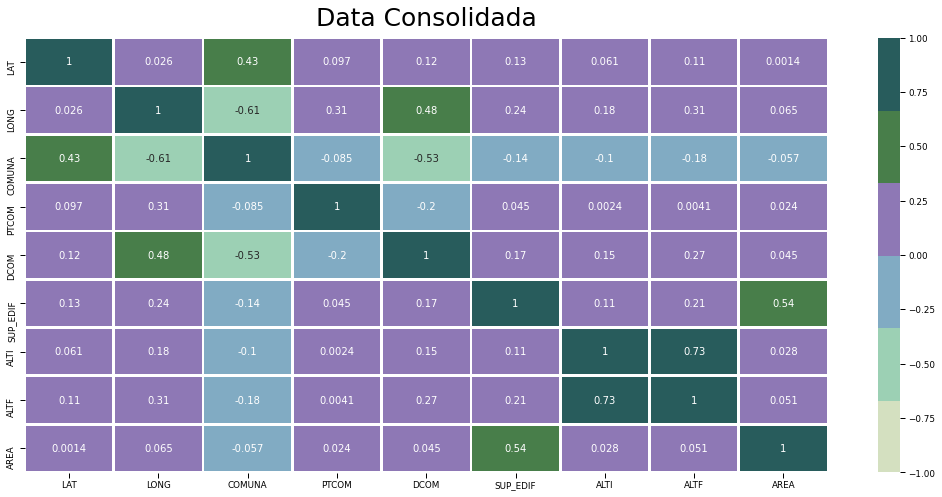

In [146]:
#VISUALIZAMOS CORRELACION DEL DATASET MERGE
plt.figure(figsize=(18, 8))
sequential_colors = sns.color_palette("ch:-225.5,144.2,dark=.3")
heatmap = sns.heatmap(data_merged.corr(), vmin=-1, vmax=1, annot=True,linewidths=1.8,cmap=sequential_colors)
heatmap.set_title('Data Consolidada', fontdict={'fontsize':25}, pad=12);

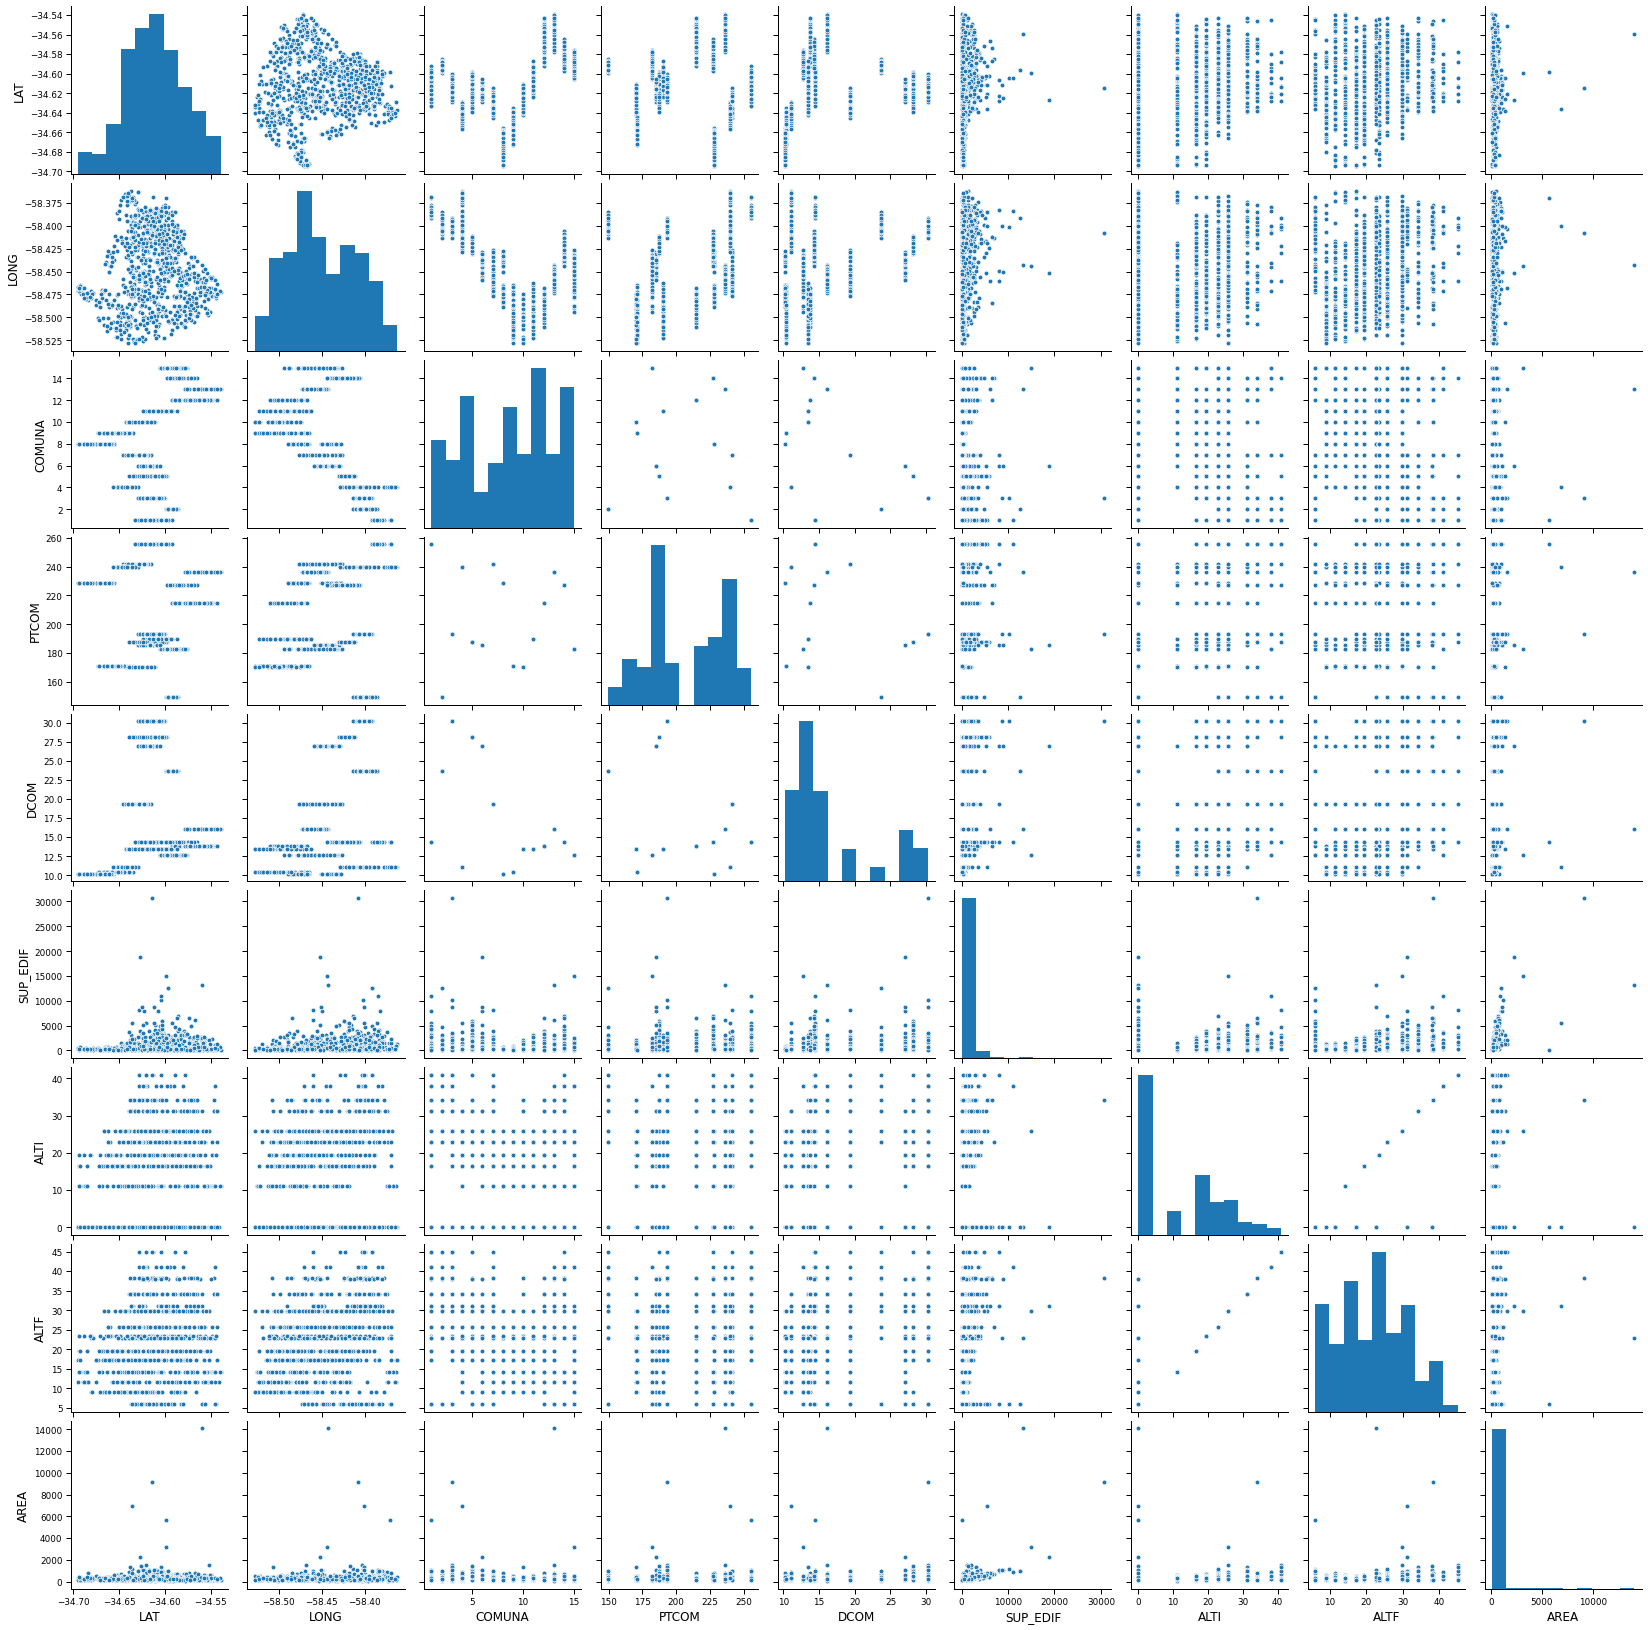

In [147]:
sns.pairplot(data_merged.sample(1000, random_state=234));

### Area y Superficie

Se muestra como la superficie edificada puede ser tan baja como 0 o es mayor que la superficie del terreno


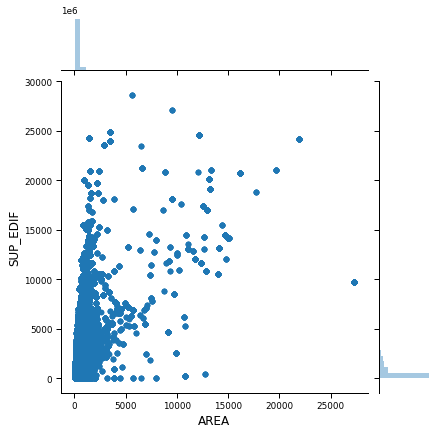

In [148]:
#VISUALIZO
d=data_merged[(data_merged["SUP_EDIF"]<30000) & (data_merged["AREA"]<30000)]
a_s = pd.concat([d["AREA"],d["SUP_EDIF"]],axis=1)
print("Se muestra como la superficie edificada puede ser tan baja como 0 o es mayor que la superficie del terreno")
sns.jointplot(x="AREA", y="SUP_EDIF", data=a_s)

In [149]:
a0=data_merged.SUP_EDIF.dropna() #Quitamos los NaN de la columna SUP_EDIF
b0=data_merged.AREA[a0.index] #Nos quedamos con los valores de AREA en dónde hay valores de SUP_EDIF
print("La media de SUP_EDIF es mayor a la media de AREA?: ", a0.mean()>b0.mean())

c0=a0/b0 #Dividimos ambos para ver cuánto más grande es SUP_EDIF respecto a AREA
d0=np.trim_zeros(c0) #Quitamos los que hayan dado cero
d0=np.sort(d0) #Los ordenamos
e0=pd.qcut(d0,60) #Dividimos en cuartiles
f0=e0.unique()[29].mid #Nos quedamos con un cuartil intermedio para quitar los outliers y calculamos el punto medio
print("Los valores de la columna SUP_EDIF son aproximadamente ",f0," más grande que los valores de AREA")


La media de SUP_EDIF es mayor a la media de AREA?:  True
Los valores de la columna SUP_EDIF son aproximadamente  1.405  más grande que los valores de AREA


In [150]:
#COMPLETO
data_merged.SUP_EDIF.fillna(value = data_merged.AREA*f0, inplace=True)
print("Nulls en Superficie edificada =", data_merged.SUP_EDIF.isnull().sum())
print()
data_merged.shape

Nulls en Superficie edificada = 0



(1359006, 13)

### GET DUMMIES

In [151]:
data_merged.dropna(inplace=True)
data_merged.shape

(1359006, 13)

In [152]:
#dummies de barrio
dummy = pd.get_dummies(data_merged["BARRIO"], drop_first=True)

#concatenamos y creamos data_merged2 Dataframe
data_merged2 = pd.concat([data_merged,dummy],axis=1)
data_merged2 = data_merged2.drop(["BARRIO"],axis=1)

data_merged2.head(4)

,SMP,LAT,LONG,COMUNA,PTCOM,DCOM,SUP_EDIF,ALTI,ALTF,AREA,...,VILLA GRAL. MITRE,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA
0,047-060-001,-34.594585,-58.456707,15.0,182.445,12.7,737.0,19.5,23.5,180.2,...,0,0,0,0,0,0,0,0,0,0
1,047-060-001,-34.594585,-58.456707,15.0,182.445,12.7,737.0,0.0,17.2,180.2,...,0,0,0,0,0,0,0,0,0,0
2,047-060-001,-34.594585,-58.456707,15.0,182.445,12.7,737.0,16.5,19.5,180.2,...,0,0,0,0,0,0,0,0,0,0
3,047-060-001,-34.594585,-58.456707,15.0,182.445,12.7,737.0,16.5,19.5,180.2,...,0,0,0,0,0,0,0,0,0,0


In [153]:
#dummies de comuna
dummy2 = pd.get_dummies(data_merged2["COMUNA"], prefix="COM",drop_first=True)

#concatenamos y creamos data_merged3 Dataframe
data_merged3 = pd.concat([data_merged2, dummy2],axis=1)
data_merged3 = data_merged3.drop(["COMUNA"],axis=1)

data_merged3.sample()

,SMP,LAT,LONG,PTCOM,DCOM,SUP_EDIF,ALTI,ALTF,AREA,RAMA,...,COM_6.0,COM_7.0,COM_8.0,COM_9.0,COM_10.0,COM_11.0,COM_12.0,COM_13.0,COM_14.0,COM_15.0
717404,020-042-003,-34.609863,-58.397818,193.115,30.2,775.0,0.0,6.0,278.0,EDIFICIOS,...,0,0,0,0,0,0,0,0,0,0


In [154]:
#data_merged3.columns

### Revisamos relaciones entre valores de variables

In [155]:
#reviso valores de etiqueta cuando no esta edificada
rel1 = (data_merged3.PREDICT == "VIVIENDA")&(data_merged3.SUP_EDIF == 0.0)
test1= data_merged3[rel1]
test1.iloc[:,5:11].sample(10),  #ESTAN SIN DECLARAR,pueden ser casas, edificios, ph,  PINCHA 

(         SUP_EDIF  ALTI  ALTF   AREA       RAMA   PREDICT
 971214        0.0   0.0  11.6  366.6  EDIFICIOS  VIVIENDA
 1206420       0.0  25.8  29.8  252.2  EDIFICIOS  VIVIENDA
 9449          0.0   0.0  17.2  315.8  EDIFICIOS  VIVIENDA
 1194136       0.0  34.2  38.2  237.9  EDIFICIOS  VIVIENDA
 1144878       0.0  34.2  38.2  632.0  EDIFICIOS  VIVIENDA
 1050311       0.0   0.0  11.6  267.8  EDIFICIOS  VIVIENDA
 1129265       0.0  25.8  29.8  289.4  EDIFICIOS  VIVIENDA
 1108552       0.0  22.8  25.8  411.1  EDIFICIOS  VIVIENDA
 282949        0.0   0.0   6.0  338.3  EDIFICIOS  VIVIENDA
 1094330       0.0   0.0  31.2  406.0  EDIFICIOS  VIVIENDA,)

In [156]:
print("previo=",data_merged3.shape)

previo= (1359006, 71)


In [157]:
#REMUEVO
indexNames = data_merged3[ (data_merged3.PREDICT == "VIVIENDA")&(data_merged3.SUP_EDIF == 0.0) ].index
data_merged3.drop(indexNames , inplace=True)
print("luego de limpiar=",data_merged3.shape)

luego de limpiar= (1356915, 71)


In [158]:
#reviso valores de etiqueta
rel2 = data_merged3.PREDICT == "USO UNICO"
test2= data_merged3[rel2]
test2.iloc[:,5:11].sample(10)

,SUP_EDIF,ALTI,ALTF,AREA,RAMA,PREDICT
683944,432.0,0.0,31.2,155.9,EDIFICIOS,USO UNICO
624390,1148.0,0.0,31.2,267.6,EDIFICIOS,USO UNICO
639537,1283.0,0.0,6.0,501.3,EDIFICIOS,USO UNICO
227544,672.0,19.5,23.5,139.6,EDIFICIOS,USO UNICO
1288105,651.0,0.0,22.8,177.9,EDIFICIOS,USO UNICO
591946,352.0,0.0,6.0,112.2,EDIFICIOS,USO UNICO
1252780,2100.0,0.0,6.0,1378.7,EDIFICIOS,USO UNICO
598372,1965.0,0.0,6.0,423.2,EDIFICIOS,USO UNICO
18808,1070.0,16.5,19.5,984.1,EDIFICIOS,USO UNICO
122589,496.0,11.2,14.2,204.4,EDIFICIOS,USO UNICO


In [159]:
#reviso valores de etiqueta cuando no esta edificada
rel3 = (data_merged3.PREDICT == "VU - VIVIENDA UNICA")&(data_merged3.SUP_EDIF == 0)
test3 = data_merged3[rel3]
test3.iloc[:,5:11].sample(10)

,SUP_EDIF,ALTI,ALTF,AREA,RAMA,PREDICT
1292952,0.0,41.0,45.0,177.6,EDIFICIOS,VU - VIVIENDA UNICA
507020,0.0,25.8,29.8,186.6,EDIFICIOS,VU - VIVIENDA UNICA
425888,0.0,25.8,29.8,254.1,EDIFICIOS,VU - VIVIENDA UNICA
1096811,0.0,19.5,23.5,328.4,EDIFICIOS,VU - VIVIENDA UNICA
1271238,0.0,22.8,25.8,233.2,EDIFICIOS,VU - VIVIENDA UNICA
1351440,0.0,0.0,22.8,159.5,EDIFICIOS,VU - VIVIENDA UNICA
828257,0.0,0.0,38.0,380.2,EDIFICIOS,VU - VIVIENDA UNICA
70238,0.0,22.8,25.8,325.1,EDIFICIOS,VU - VIVIENDA UNICA
1026380,0.0,0.0,17.2,195.7,EDIFICIOS,VU - VIVIENDA UNICA
171821,0.0,16.5,19.5,634.3,EDIFICIOS,VU - VIVIENDA UNICA


In [160]:
print("previo=",data_merged3.shape)

previo= (1356915, 71)


In [161]:
#REMUEVO
indexNames2 = data_merged3[ (data_merged3.PREDICT == "VU - VIVIENDA UNICA")&(data_merged3.SUP_EDIF == 0) ].index
data_merged3.drop(indexNames2 , inplace=True)
print("luego de limpiar=",data_merged3.shape)

luego de limpiar= (1356371, 71)


In [162]:
#cambiar a codigo si cambia la perspectiva
#esta etiqueta va a residencial

In [163]:
rel4 = (data_merged3.PREDICT == "INMOBILIARIA")&(data_merged3.SUP_EDIF >=3000)
test4 = data_merged3[rel4]
test4.iloc[:,5:11].sample(10)

,SUP_EDIF,ALTI,ALTF,AREA,RAMA,PREDICT
746329,3723.0,34.2,38.2,491.7,SERVICIOS INMOBILIARIOS,INMOBILIARIA
343929,4339.0,0.0,6.0,504.5,SERVICIOS INMOBILIARIOS,INMOBILIARIA
778157,3426.0,0.0,6.0,1606.5,SERVICIOS INMOBILIARIOS,INMOBILIARIA
689594,6044.0,41.0,45.0,393.3,SERVICIOS INMOBILIARIOS,INMOBILIARIA
270769,3016.0,19.5,23.5,424.8,SERVICIOS INMOBILIARIOS,INMOBILIARIA
835258,3267.0,22.8,25.8,402.8,SERVICIOS INMOBILIARIOS,INMOBILIARIA
269056,8001.0,0.0,38.0,682.6,SERVICIOS INMOBILIARIOS,INMOBILIARIA
1299530,3148.0,31.2,34.2,294.5,SERVICIOS INMOBILIARIOS,INMOBILIARIA
1324733,3777.0,0.0,38.0,277.3,SERVICIOS INMOBILIARIOS,INMOBILIARIA
134151,4398.0,22.8,25.8,553.4,SERVICIOS INMOBILIARIOS,INMOBILIARIA


In [164]:
print("previo=",data_merged3.shape)

previo= (1356371, 71)


In [165]:
#REMUEVO
indexNames3 = data_merged3[rel4].index
data_merged3.drop(indexNames3 , inplace=True)
print("luego de limpiar=",data_merged3.shape)

luego de limpiar= (1355749, 71)


In [166]:
#reviso valores de etiqueta PELUQUERIA
rel5 = (data_merged3.PREDICT == "PELUQUERIA")&(data_merged3.SUP_EDIF >= 2000)
test5 = data_merged3[rel5]
test5.iloc[:,5:11].sample(10)

,SUP_EDIF,ALTI,ALTF,AREA,RAMA,PREDICT
1241297,2738.0,25.8,29.8,244.2,OTROS SERVICIOS,PELUQUERIA
1191859,2965.0,34.2,38.2,388.2,OTROS SERVICIOS,PELUQUERIA
1341119,2285.0,25.8,29.8,250.9,OTROS SERVICIOS,PELUQUERIA
1324293,3549.0,0.0,38.0,299.7,OTROS SERVICIOS,PELUQUERIA
252553,2726.0,22.8,25.8,253.3,OTROS SERVICIOS,PELUQUERIA
669456,2782.0,19.5,23.5,415.5,OTROS SERVICIOS,PELUQUERIA
240241,14479.0,34.2,38.2,14657.3,OTROS SERVICIOS,PELUQUERIA
129216,3198.0,22.8,25.8,382.6,OTROS SERVICIOS,PELUQUERIA
1324560,2502.0,22.8,25.8,312.4,OTROS SERVICIOS,PELUQUERIA
1189091,2426.0,22.8,25.8,291.3,OTROS SERVICIOS,PELUQUERIA


In [167]:
print("previo=",data_merged3.shape)

previo= (1355749, 71)


In [168]:
#REMUEVO
indexNames4 = data_merged3[rel5].index
data_merged3.drop(indexNames4 , inplace=True)
print("luego de limpiar=",data_merged3.shape)

luego de limpiar= (1353316, 71)


In [169]:
#reviso valores de etiqueta PELUQUERIA
rel6 = (data_merged3.PREDICT == "RESTAURANTE")&(data_merged3.SUP_EDIF >=2000)
test6 = data_merged3[rel6]
test6.iloc[:,5:11].sample(10)

,SUP_EDIF,ALTI,ALTF,AREA,RAMA,PREDICT
284000,2332.0,0.0,6.0,1133.2,HOTELERIA Y GASTRONOMIA,RESTAURANTE
589785,2199.0,22.8,25.8,229.1,HOTELERIA Y GASTRONOMIA,RESTAURANTE
1299324,2477.0,0.0,6.0,165.3,HOTELERIA Y GASTRONOMIA,RESTAURANTE
672377,3081.0,19.5,23.5,638.7,HOTELERIA Y GASTRONOMIA,RESTAURANTE
595725,2716.0,0.0,6.0,967.2,HOTELERIA Y GASTRONOMIA,RESTAURANTE
622699,2152.0,0.0,31.2,255.4,HOTELERIA Y GASTRONOMIA,RESTAURANTE
1155022,2102.0,34.2,38.2,289.4,HOTELERIA Y GASTRONOMIA,RESTAURANTE
627456,18719.0,22.8,25.8,1659.5,HOTELERIA Y GASTRONOMIA,RESTAURANTE
598239,2054.0,0.0,38.0,194.1,HOTELERIA Y GASTRONOMIA,RESTAURANTE
681960,3083.0,31.2,34.2,319.0,HOTELERIA Y GASTRONOMIA,RESTAURANTE


In [170]:
print("previo=",data_merged3.shape)

previo= (1353316, 71)


In [171]:
#REMUEVO
indexNames5 = data_merged3[ rel6 ].index
data_merged3.drop(indexNames5 , inplace=True)
print("luego de limpiar=",data_merged3.shape)

luego de limpiar= (1352878, 71)


## Preparo datoS a visualizar

In [172]:
data_merged3.dropna(inplace=True)
dataplot = data_merged3.iloc[:,3:11]

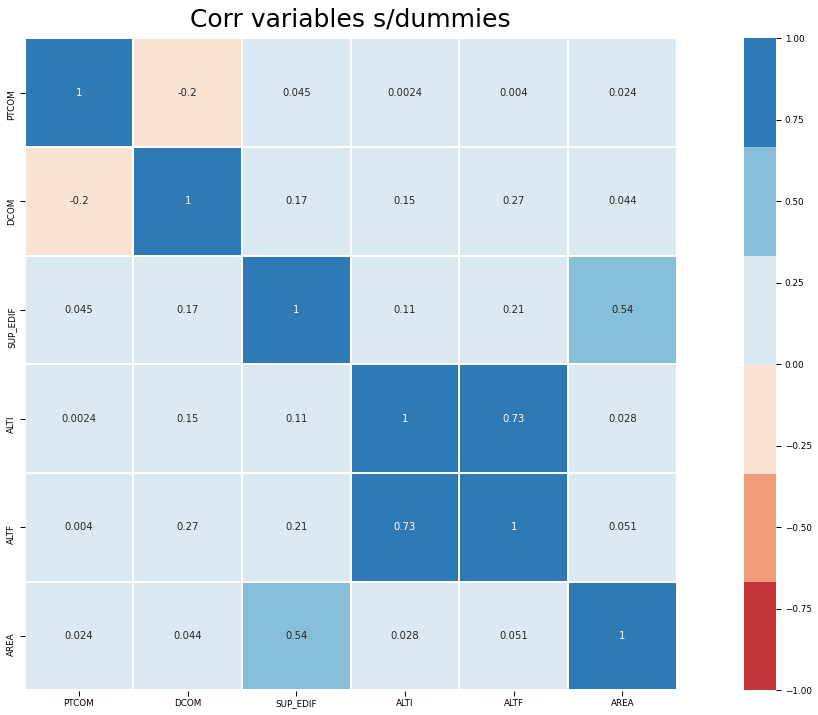

In [173]:
#VISUALIZO
plt.figure(figsize=(24, 12))
sequential_colors = sns.color_palette("RdBu")
heatmap = sns.heatmap(dataplot.corr(), vmin=-1, vmax=1,square="equal",linewidths=1.18,cmap=sequential_colors,annot=True,)
heatmap.set_title('Corr variables s/dummies', fontdict={'fontsize':25}, pad=12);
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":13,"axes.labelsize":12}) 
plt.show()

## Reduzco Categorías/clases de la Etiqueta Predict
Vamos a elegir de piso las primeras 3O clases ordenadas de acuerdo a la CANTIDAD DE APARICIONES

In [174]:
#TEST Y PRE -REDUCCION EN Y
alfa = data_merged3.PREDICT.value_counts()
alfa

VIVIENDA                              398363
GARAGE PRIVADO                        262083
CASA                                  179128
LOCAL CERRADO                          72377
VU - VIVIENDA UNICA                    41430
                                       ...  
SALON DE JUEGOS RECREATIVOS                4
FABRICA DE BALANZAS                        4
TERMINAL DE MICROS                         4
AVES Y HUEVOS (VENTA)                      2
LABORATORIO DE RECETAS MAGISTRALES         2
Name: PREDICT, Length: 662, dtype: int64

In [175]:
#NOS QUEDAMOS CON LAS ETIQUETAS PRESENTES X CANTIDAD DE VECES = QUE CANTIDAD DE LOTES VACIOS.
d2 = data_merged3[data_merged3.PREDICT.isin(alfa.index[alfa>4200])]

#REVISAMOS NUEVO DATAFRAME
d2.PREDICT.value_counts().head(50)

VIVIENDA                          398363
GARAGE PRIVADO                    262083
CASA                              179128
LOCAL CERRADO                      72377
VU - VIVIENDA UNICA                41430
I FEMENINA                         17809
OFICINAS                           16458
EDIFICIO PRODUCTIVO                15848
DEPOSITO                           14857
TALLER MECANICO DE AUTOMOTORES      9189
I                                   8730
SUPERMERCADO                        8016
PELUQUERIA                          7151
DEPARTAMENTOS                       6628
INMOBILIARIA                        6108
ABANDONADO                          6107
KIOSCO                              5962
MAXIKIOSCO                          5515
EDU                                 5362
GARAGE                              5296
EN OBRA                             5198
USO UNICO                           5068
I BEBES Y NIÑOS                     4773
VERDULERIA                          4390
CALZADO         

## Reducción de registros para analisis

In [176]:
#NOS ASEGURAMOS UN NUEVO DATAFRAME CON 100.000 REGISTROS
Z= d2.copy()
Z= Z.sample(500000, random_state=3)
Z.shape

(500000, 71)

In [177]:
#ELIMINAMOS LAS MUESTRAS CON SUPERFICIE CONSTRUIDA >20000 M2
Z1=Z[Z.SUP_EDIF<20000]
Z1=Z1[Z1.AREA<20000]
Z1.shape

(499619, 71)

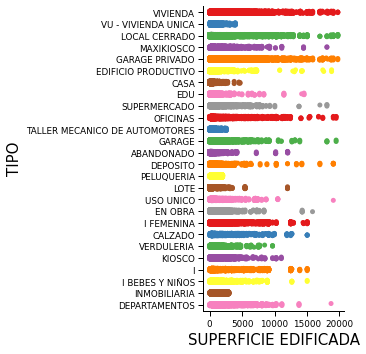

In [178]:
#GRAFICAMOS
Z3=Z.drop(['SUP_EDIF',"RAMA"], axis=1)
A1 = pd.concat([Z1.SUP_EDIF,Z3],axis=1).dropna()
sns.catplot(y="PREDICT", x="SUP_EDIF", data=A1, palette="Set1")
plt.ylabel('TIPO',fontsize = 15)
plt.xlabel('SUPERFICIE EDIFICADA',fontsize = 15);

## Reviso valores de etiqueta garage, siguiendo la documentacion del dataset

Garaje privado: parte de un edificio residencial unifamiliar en que uno o más módulos son ocupados única y 
exclusivamente por uno o más vehículos del propietario del inmueble o del arrendatario o usuario autorizado 
mediante cualquier convenio por dicho propietario, formando parte integral del inmueble aunque el módulo vehicular 
fuera semicubierto, abierto al aire libre o constituyera un cuerpo de edificación distinto del edificio residencial 
unifamiliar
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiXz_vupuXvAhWJH7kGHSliCuQQFjAAegQIBhAD&url=https%3A%2F%2Fwww.buenosaires.gob.ar%2Fareas%2Fplaneamiento_obras%2Fplaneamiento%2Fpdf%2Fseccion_01.pdf&usg=AOvVaw2tBAStWftsbZxsVwur-r9L

Text(0.5, 6.799999999999994, 'SUPERFICIE EDIFICADA')

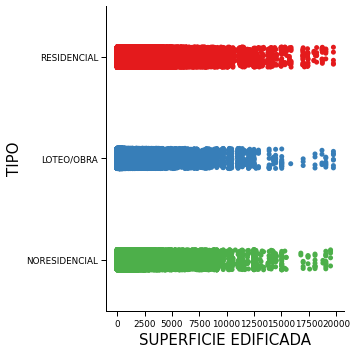

In [179]:
#RETIQUETAMOS
Z2= A1.copy()
Z2.PREDICT = Z2.PREDICT.replace(["I","I FEMENINA","PELUQUERIA","SUPERMERCADO","MAXIKIOSCO","KIOSCO","TALLER MECANICO DE AUTOMOTORES","RESTAURANTE","PUESTO DIARIOS","VERDULERIA","CALZADO","I BEBES Y NIÑOS","GARAGE","DEPOSITO","EDU","USO UNICO","OFICINAS","INMOBILIARIA","EDIFICIO PRODUCTIVO"],"NORESIDENCIAL")#
Z2.PREDICT = Z2.PREDICT.replace(["CASA","DEPARTAMENTOS","VIVIENDA","VU - VIVIENDA UNICA","GARAGE PRIVADO"],"RESIDENCIAL")#
Z2.PREDICT = Z2.PREDICT.replace(["LOTE","ABANDONADO","EN OBRA","LOTEO","LOCAL CERRADO"],"LOTEO/OBRA")# 
Z2.PREDICT.value_counts(ascending=False)
#GRAFICO
sns.catplot(y="PREDICT", x="SUP_EDIF", data=Z2, palette="Set1")
plt.ylabel('TIPO',fontsize = 15)
plt.xlabel('SUPERFICIE EDIFICADA',fontsize = 15)

In [180]:
print("reviso no perder registros Z2", Z2.shape,"tiene la misma cantidad de filas que A1",A1.shape )

reviso no perder registros Z2 (499619, 70) tiene la misma cantidad de filas que A1 (499619, 70)


# Cambiamos los labels de nuestra Y

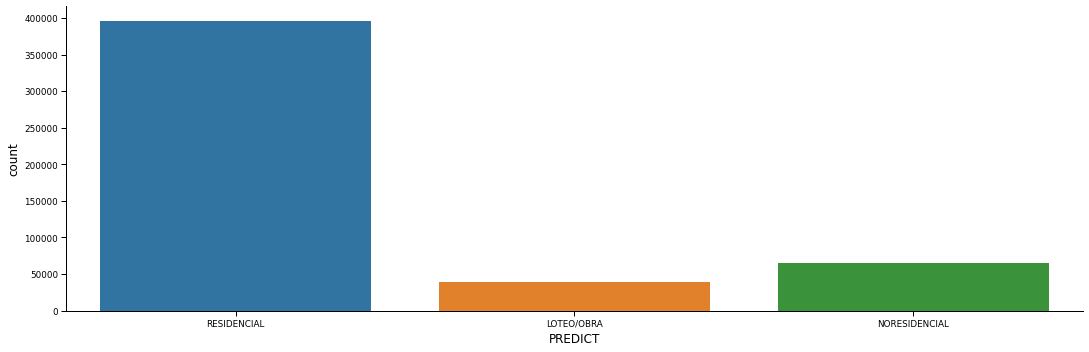

In [181]:
sns.catplot('PREDICT',data=Z2,kind="count", aspect=3)

In [208]:
A4 = Z2.sample(20000)
A4.dropna(inplace=True)

In [209]:
A4

,SUP_EDIF,SMP,LAT,LONG,PTCOM,DCOM,ALTI,ALTF,AREA,PREDICT,...,COM_6.0,COM_7.0,COM_8.0,COM_9.0,COM_10.0,COM_11.0,COM_12.0,COM_13.0,COM_14.0,COM_15.0
447922,691.0,054-095-015,-34.635376,-58.486677,170.497,13.5,0.0,6.0,908.6,RESIDENCIAL,...,0,0,0,0,1,0,0,0,0,0
1290863,1754.0,021-060-025,-34.581192,-58.407806,227.060,14.3,22.8,25.8,328.6,RESIDENCIAL,...,0,0,0,0,0,0,0,0,1,0
397676,316.0,085-047-034,-34.619612,-58.504740,170.497,13.5,0.0,17.2,198.3,RESIDENCIAL,...,0,0,0,0,1,0,0,0,0,0
767801,247.0,024-049-009,-34.638669,-58.398822,239.712,11.1,0.0,17.2,492.0,RESIDENCIAL,...,0,0,0,0,0,0,0,0,0,0
17613,290.0,037-006-007,-34.582116,-58.454381,182.445,12.7,0.0,17.2,396.0,RESIDENCIAL,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070130,1846.0,051-009-044,-34.578677,-58.492894,214.518,13.8,22.8,25.8,349.9,RESIDENCIAL,...,0,0,0,0,0,0,1,0,0,0
76421,207.0,031-028-014,-34.597749,-58.436965,182.445,12.7,25.8,29.8,224.8,RESIDENCIAL,...,0,0,0,0,0,0,0,0,0,1
729828,256.0,020-009-018,-34.613115,-58.403952,193.115,30.2,22.8,25.8,352.1,LOTEO/OBRA,...,0,0,0,0,0,0,0,0,0,0
108464,236.0,049-128-002,-34.588027,-58.466291,182.445,12.7,0.0,17.2,179.0,RESIDENCIAL,...,0,0,0,0,0,0,0,0,0,1


In [210]:
Atypes = A4.PREDICT.unique()
Atypes

array(['RESIDENCIAL', 'LOTEO/OBRA', 'NORESIDENCIAL'], dtype=object)

In [211]:
A4["TYPEP"] = A4.PREDICT.astype('category')
A4.TYPEP.dtypes

CategoricalDtype(categories=['LOTEO/OBRA', 'NORESIDENCIAL', 'RESIDENCIAL'], ordered=False)

In [212]:
## PARA GRAFICAR USO CAT CODES

In [213]:
#CREO MI NUEVA COLUMNA A PREDECIR
A4["Y"] = A4["TYPEP"].cat.codes
#Reviso CONCORDANCIA de los codigos
A4.loc[:, ['Y', 'PREDICT']]


,Y,PREDICT
447922,2,RESIDENCIAL
1290863,2,RESIDENCIAL
397676,2,RESIDENCIAL
767801,2,RESIDENCIAL
17613,2,RESIDENCIAL
...,...,...
1070130,2,RESIDENCIAL
76421,2,RESIDENCIAL
729828,0,LOTEO/OBRA
108464,2,RESIDENCIAL


In [214]:
A4.columns

Index(['SUP_EDIF', 'SMP', 'LAT', 'LONG', 'PTCOM', 'DCOM', 'ALTI', 'ALTF',
       'AREA', 'PREDICT', 'ALMAGRO', 'BALVANERA', 'BARRACAS', 'BELGRANO',
       'BOCA', 'BOEDO', 'CABALLITO', 'CHACARITA', 'COGHLAN', 'COLEGIALES',
       'CONSTITUCION', 'FLORES', 'FLORESTA', 'LINIERS', 'MATADEROS',
       'MONTE CASTRO', 'MONTSERRAT', 'NUEVA POMPEYA', 'NUÑEZ', 'PALERMO',
       'PARQUE AVELLANEDA', 'PARQUE CHACABUCO', 'PARQUE CHAS',
       'PARQUE PATRICIOS', 'PATERNAL', 'RECOLETA', 'RETIRO', 'SAAVEDRA',
       'SAN CRISTOBAL', 'SAN NICOLAS', 'SAN TELMO', 'VELEZ SARSFIELD',
       'VERSALLES', 'VILLA CRESPO', 'VILLA DEL PARQUE', 'VILLA DEVOTO',
       'VILLA GRAL. MITRE', 'VILLA LUGANO', 'VILLA LURO', 'VILLA ORTUZAR',
       'VILLA PUEYRREDON', 'VILLA REAL', 'VILLA RIACHUELO', 'VILLA SANTA RITA',
       'VILLA SOLDATI', 'VILLA URQUIZA', 'COM_2.0', 'COM_3.0', 'COM_4.0',
       'COM_5.0', 'COM_6.0', 'COM_7.0', 'COM_8.0', 'COM_9.0', 'COM_10.0',
       'COM_11.0', 'COM_12.0', 'COM_13.0', 'COM_14.0

In [215]:
A4.Y.value_counts()

2    15804
1     2585
0     1611
Name: Y, dtype: int64

In [216]:
#PARA LAS VARIABLES REEMPLAZO LABEL ENCODER PARA EVITAR PESO.

In [217]:
A4=A4.drop(['SMP'], axis=1)

In [218]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
lab_enc.fit(A4['PREDICT'])

LabelEncoder()

In [219]:
yLE = lab_enc.transform(A4['PREDICT'])
XLE = pd.get_dummies(A4.drop('PREDICT', axis=1),drop_first=True)


In [220]:
# vemos la forma final la matriz de features
print(XLE.shape)
XLE.head()

(20000, 71)


,SUP_EDIF,LAT,LONG,PTCOM,DCOM,ALTI,ALTF,AREA,ALMAGRO,BALVANERA,...,COM_9.0,COM_10.0,COM_11.0,COM_12.0,COM_13.0,COM_14.0,COM_15.0,Y,TYPEP_NORESIDENCIAL,TYPEP_RESIDENCIAL
447922,691.0,-34.635376,-58.486677,170.497,13.5,0.0,6.0,908.6,0,0,...,0,1,0,0,0,0,0,2,0,1
1290863,1754.0,-34.581192,-58.407806,227.060,14.3,22.8,25.8,328.6,0,0,...,0,0,0,0,0,1,0,2,0,1
397676,316.0,-34.619612,-58.504740,170.497,13.5,0.0,17.2,198.3,0,0,...,0,1,0,0,0,0,0,2,0,1
767801,247.0,-34.638669,-58.398822,239.712,11.1,0.0,17.2,492.0,0,0,...,0,0,0,0,0,0,0,2,0,1
17613,290.0,-34.582116,-58.454381,182.445,12.7,0.0,17.2,396.0,0,0,...,0,0,0,0,0,0,1,2,0,1


In [221]:
# vemos la forma final del vector target
print(yLE.shape)
yLE

(20000,)


array([2, 2, 2, ..., 0, 2, 2])

In [222]:
A4["Y"] = yLE
#Reviso CONCORDANCIA de los codigos
A4.loc[:, ['Y', 'PREDICT']]
A4.Y.value_counts()

2    15804
1     2585
0     1611
Name: Y, dtype: int64

In [251]:
A4.Y

447922     2
1290863    2
397676     2
767801     2
17613      2
          ..
1070130    2
76421      2
729828     0
108464     2
810924     2
Name: Y, Length: 20000, dtype: int32

## Elegimos columans y reducimos

In [268]:
t = A4.drop(["PREDICT","TYPEP"], axis=1)
t.dropna(inplace=True)
print("antes era", A4.shape,"ahora tenemos", t.shape)

antes era (20000, 71) ahora tenemos (20000, 69)


In [269]:
#vemos nuestras opciones en nuestra columna a predecir
t.Y.unique()

array([2, 0, 1])

In [270]:
t.to_csv('DATA/t_limpio_v10.csv', index=False)

In [271]:
#para trabajar con las incidencias, me guardo las observaciones de cada tipo/clase en dfs separados
Loteo_obra = t[t.Y == 0] 
no_residencial = t[t.Y == 1]
residencial = t[t.Y == 2] 

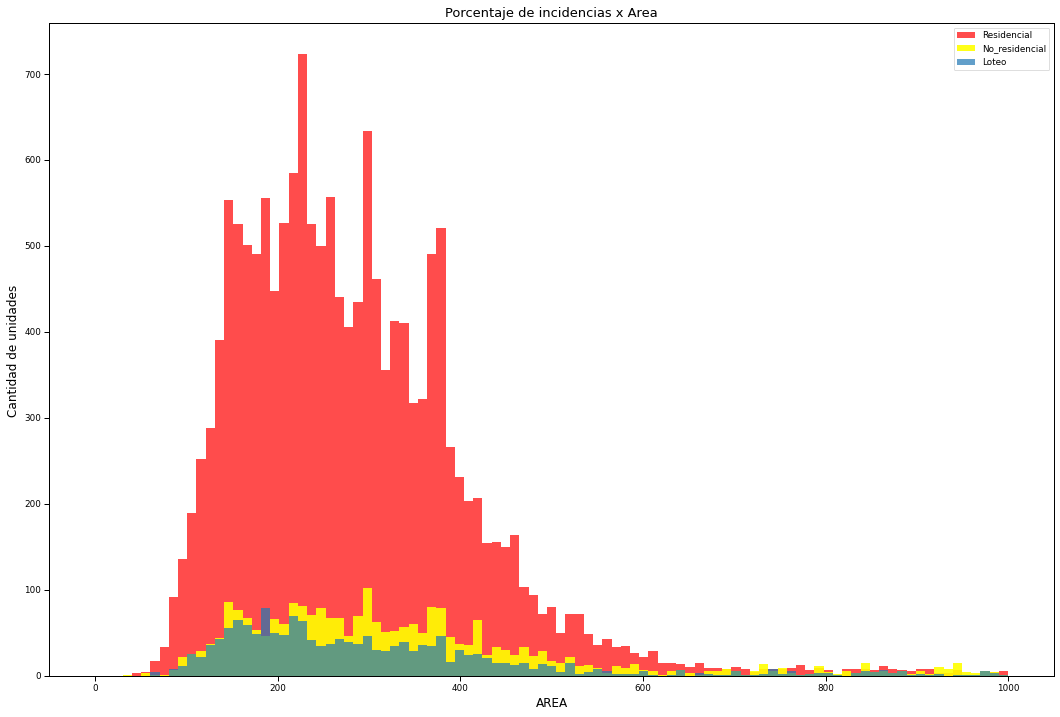

In [272]:
#plot de grades dimensiones
plt.figure( figsize=(18,12))
bins = np.linspace(0, 1000, 100)
plt.hist(residencial.AREA, bins,alpha=0.7, histtype='barstacked',color="red", label='Residencial')
plt.hist(no_residencial.AREA, bins,alpha=0.9,histtype='barstacked', color="yellow",label='No_residencial')
plt.hist(Loteo_obra.AREA, bins,alpha=0.7, histtype='barstacked',label='Loteo')

plt.legend(loc='upper right')
plt.title("Porcentaje de incidencias x Area")
plt.xlabel("AREA")
plt.ylabel("Cantidad de unidades "),
plt.show()


## Reduzco mi Y en dos clases
Asumo riesgo de que el imput sea comercio y a la vez edificio residencial, voy a reprocesar más arriba.

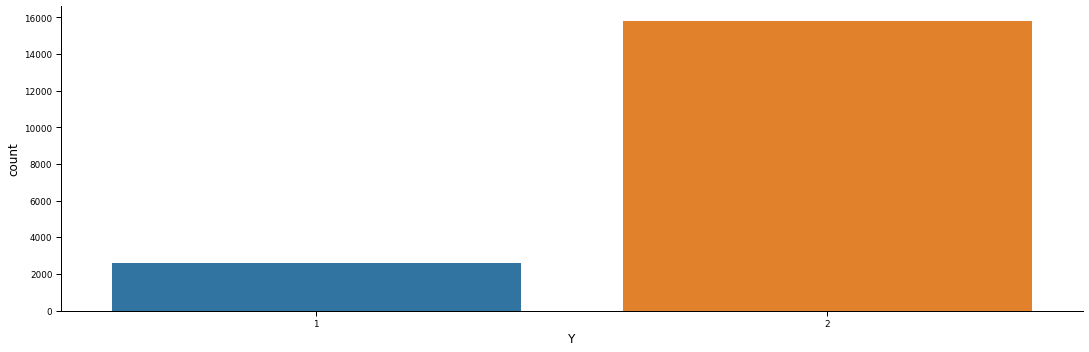

In [273]:
# valores binarios, saco lote, dejo residencial no residencial
t = t.loc[t.Y != 0]
t.Y.value_counts()
sns.catplot('Y',data=t,kind="count", aspect=3)

Text(-7.324999999999999, 0.5, 'SUPERFICIE EDIFICADA')

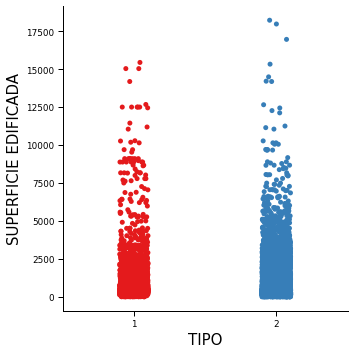

In [274]:
#Reviso relacion variable con SUPERFICIE EDIF
sns.catplot(y="SUP_EDIF", x="Y", data=t, palette="Set1")
plt.xlabel('TIPO',fontsize = 15)
plt.ylabel('SUPERFICIE EDIFICADA',fontsize = 15)

In [275]:
t.head()

,SUP_EDIF,LAT,LONG,PTCOM,DCOM,ALTI,ALTF,AREA,ALMAGRO,BALVANERA,...,COM_7.0,COM_8.0,COM_9.0,COM_10.0,COM_11.0,COM_12.0,COM_13.0,COM_14.0,COM_15.0,Y
447922,691.0,-34.635376,-58.486677,170.497,13.5,0.0,6.0,908.6,0,0,...,0,0,0,1,0,0,0,0,0,2
1290863,1754.0,-34.581192,-58.407806,227.060,14.3,22.8,25.8,328.6,0,0,...,0,0,0,0,0,0,0,1,0,2
397676,316.0,-34.619612,-58.504740,170.497,13.5,0.0,17.2,198.3,0,0,...,0,0,0,1,0,0,0,0,0,2
767801,247.0,-34.638669,-58.398822,239.712,11.1,0.0,17.2,492.0,0,0,...,0,0,0,0,0,0,0,0,0,2
17613,290.0,-34.582116,-58.454381,182.445,12.7,0.0,17.2,396.0,0,0,...,0,0,0,0,0,0,0,0,1,2


Text(-7.324999999999999, 0.5, 'AREA')

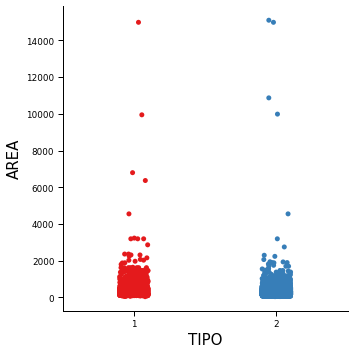

In [276]:
#Reviso relacion variable con AREA
sns.catplot(y="AREA", x="Y", data=t, palette="Set1")
plt.xlabel('TIPO',fontsize = 15)
plt.ylabel('AREA',fontsize = 15)

## Seteamos volumen de DATAFRAME que usaremos para correr nuestros modelos


In [278]:
t = t.sample(10000, random_state=5)

In [277]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [279]:
t2=t.copy()
t2

,SUP_EDIF,LAT,LONG,PTCOM,DCOM,ALTI,ALTF,AREA,ALMAGRO,BALVANERA,...,COM_7.0,COM_8.0,COM_9.0,COM_10.0,COM_11.0,COM_12.0,COM_13.0,COM_14.0,COM_15.0,Y
846790,342.0,-34.651977,-58.514717,171.062,10.4,16.5,19.5,325.4,0,0,...,0,0,1,0,0,0,0,0,0,2
135954,402.0,-34.600073,-58.490584,190.046,13.5,0.0,22.8,157.5,0,0,...,0,0,0,0,1,0,0,0,0,2
104174,126.0,-34.590985,-58.494635,182.445,12.7,0.0,9.0,161.1,0,0,...,0,0,0,0,0,0,0,0,1,2
1114377,356.0,-34.576247,-58.477359,214.518,13.8,11.2,14.2,254.3,0,0,...,0,0,0,0,0,1,0,0,0,2
17168,334.0,-34.582562,-58.451230,182.445,12.7,19.5,23.5,198.6,0,0,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359046,379.0,-34.625667,-58.438888,185.271,27.0,0.0,11.6,333.6,0,0,...,0,0,0,0,0,0,0,0,0,2
559995,170.0,-34.640130,-58.428539,241.484,19.4,0.0,9.0,154.2,0,0,...,1,0,0,0,0,0,0,0,0,2
901420,232.0,-34.645591,-58.493123,171.062,10.4,16.5,19.5,140.7,0,0,...,0,0,1,0,0,0,0,0,0,2
1295255,2967.0,-34.575630,-58.422663,227.060,14.3,25.8,29.8,335.0,0,0,...,0,0,0,0,0,0,0,1,0,2


### Teniendo en cuenta el peso de las clases, podemos darle más peso a las muestras de la clase minoritaria.

In [236]:
#probamos Upscale

In [280]:
#contamos como esta balanceada la clase.
t2.Y.value_counts()

2    8583
1    1417
Name: Y, dtype: int64

In [281]:
#tenemos que balancear mas, importamos utilidad de skalearn
from sklearn.utils import resample

In [282]:
# Creamos datasets con las distintas clase
nuevodf_clasemayor = t2[t2.Y==2]
nuevodf_clasemenor = t2[t2.Y==1]

In [283]:
# Aumentamos muestras de clase con menos
nuevodf_clasemenor_up = resample(nuevodf_clasemenor, replace=True,
                                 n_samples=4312,    # no igualamos para mantener la proporcion
                                 random_state=123)

In [284]:
# Combinamos los datos
nuevo_t2= pd.concat([nuevodf_clasemayor, nuevodf_clasemenor_up])

In [285]:
#contamos como esta balanceada la clase.
nuevo_t2.Y.value_counts()

2    8583
1    4312
Name: Y, dtype: int64

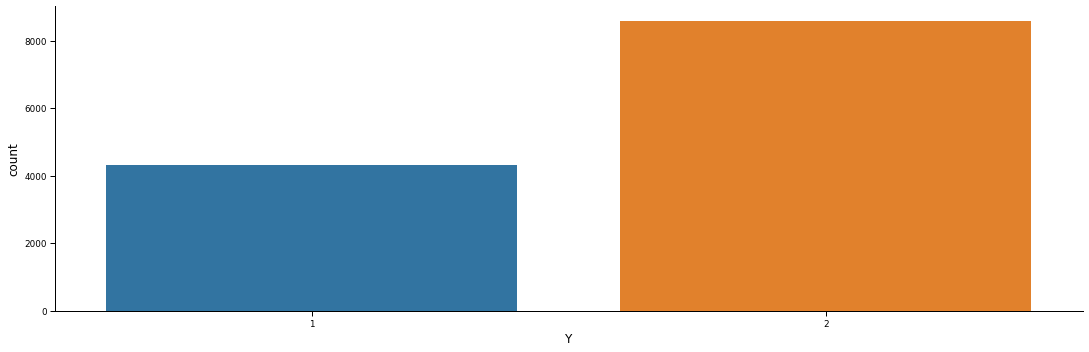

In [286]:
# Vemos la nueva distribucion
sns.catplot('Y',data=nuevo_t2,kind="count", aspect=3)

In [287]:
nuevo_t2.shape

(12895, 69)

In [288]:
X_Knn = nuevo_t2.drop(["Y"], axis=1)
X_Knn.shape

(12895, 68)

In [262]:
#X_Knn.isnull().sum()

In [289]:
y_Knn =nuevo_t2.Y
y_Knn.shape

(12895,)

In [264]:
#y_Knn.isnull().sum()

## Creamos TRAN Y TEST

In [290]:
# Separar los conjuntos de entrenamiento y testeo, estratificando por clase
X_train, X_test, y_train, y_test = train_test_split(X_Knn, y_Knn,test_size=0.33)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8639, 68)
(4256, 68)
(8639,)
(4256,)


## Standarizamos la matriz de *features*

Dijimos que KNN es un método de _machine learning_ que se basa en calcular distancia. Entonces, **lo correcto sería estandarizar las variables para eliminar sus distintas unidades de medida y evitar distorsiones debidas a diversas escalas**, cosa que adrede no hemos hecho en los pasos anteriores. Ahora, vamos a repetir el procedimiento pero estandarizando previamente las variables con `StandardScaler` y compararemos los nuevos resultados con los anteriormente obtenidos. 

In [291]:
# ¿Necesitamos estandarizar las variables?
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [292]:
# Verificamos que las variables ahora tengan media 0 y desvío 1.
print('Medias:', np.mean(X_train, axis=0).round(2))
print('Desvio:', np.std(X_train, axis=0).round(2))

Medias: [ 0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0.  0. -0. -0.  0. -0. -0.
 -0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0. -0.  0.
  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0.  0.  0. -0. -0. -0.  0.
  0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0.  0.]
Desvio: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## ¿Cómo esta la distribución de los datos Y en train y test?

In [293]:
y_train.value_counts(normalize=True)

2    0.667438
1    0.332562
Name: Y, dtype: float64

In [294]:
y_test.value_counts(normalize=True)

2    0.661889
1    0.338111
Name: Y, dtype: float64

## Elegir el k  correcto con Cross_val_score Y KFold

In [295]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

In [296]:
def scores_knn(X, y, start,stop,step):
    # Lista de diccionarios - la inicializamos vacío y por fuera del for loop para ir alimentándola en cada iteración
    scores_para_t = []
    
    for i in range(start,stop,step):
        
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
        kf = KFold(n_splits=10, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creamos un diccionario con el valor de n_neighbours y la media y el desvío de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardamos cada uno en la lista de diccionarios
        scores_para_t.append(dict_row_score)
    
    # Creamos el DF a partir de la lista de resultados
    t_scores = pd.DataFrame(scores_para_t)
    
    # Incorporamos los límites inferior y superior, restando y sumando el valor del desvío estándar, respectivamente
    t_scores['limite_inferior'] = t_scores['score_medio'] - t_scores['score_std']
    t_scores['limite_superior'] = t_scores['score_medio'] + t_scores['score_std']
    
    # Retornamos el DF
    return t_scores

In [298]:
# Probamos de 1 a 10 vecinos
t_scores= scores_knn(X_train, y_train, 1, 11, 1)
t_scores.sort_values(by="score_medio", ascending=False)

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.865146,0.006460,1,0.858686,0.871606
1,0.795347,0.008003,2,0.787344,0.803350
2,0.787823,0.011492,3,0.776331,0.799316
4,0.753213,0.008989,5,0.744224,0.762202
3,0.747308,0.009442,4,0.737866,0.756751
6,0.737240,0.013177,7,0.724063,0.750416
5,0.731105,0.011777,6,0.719328,0.742882
8,0.725895,0.013023,9,0.712872,0.738918
7,0.721843,0.012843,8,0.709001,0.734686
9,0.716634,0.013278,10,0.703356,0.729912


In [299]:
t_scores.score_medio.max()

0.8651459433071542

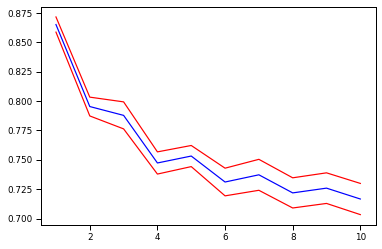

In [300]:
# Visualizamos los resultados
plt.plot(t_scores['n_neighbours'], t_scores['limite_inferior'], color='r')
plt.plot(t_scores['n_neighbours'], t_scores['score_medio'], color='b')
plt.plot(t_scores['n_neighbours'], t_scores['limite_superior'], color='r')

In [301]:
# Asignamos el valor del mejor k a una variable
best_k = t_scores.loc[t_scores.score_medio == t_scores.score_medio.max(),'n_neighbours'].values[0]
best_k

1

**Hallar un valor adecuado de _k_ es un aspecto crucial al momento de trabajar con KNN.**.
qué ocurre entre sesgo y varianza conforme varía _k_?

- De mínima, el valor de _k_ no puede ser inferior a 1, puesto que de ser igual a 0 no habría ningún vecino contra el que comparar a los datos nuevos (tampoco tendría mucho sentido hablar de identificar los -2 vecinos más cercanos, por ejemplo). Cuando _k_ vale 1, el modelo va a estar "pegándose" demasiado a cada punto del set de entrenamiento, lo que lleva a una pérdida considerable de generalidad. Las "islas" azules dentro del área naranja que se observan en la primera figura son una clara representación de esta situación. Por esto, **solemos asociar valores demasiado bajos de _k_ con una alta varianza del modelo**.
- De máxima, _k_ no puede ser mayor al número se _samples_ del conjunto de entrenamiento, ya que estaríamos pidiéndole al modelo que evalúe más puntos de los que conoce. Si _k_ = _n_, el modelo sólo aprende a predecir la clase mayoritaria en el _training set_, de ahí que en la última figura de la grilla observemos que el área azul cubre todo el gráfico. Por esto, **valores demasiado altos de _k_ suelen asociarse a un alto sesgo del modelo**.



In [302]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score

## KNeighborsClassifier: Elegimos el modelo óptimo que indique indicado cross validation

In [303]:
##### Elegimos el modelo óptimo que indique indicado cross validation
modelk = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre datos de entrenamiento
modelk.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [304]:
# Evaluamos qué accuracy obtenemos en train, Accuracy (Precisión), 
#ES DECIR El porcentaje total de elementos clasificados correctamente.
print('Precision en train=',accuracy_score(y_train, modelk.predict(X_train)))

Precision en train= 0.9994212293089478


## El tema de este numero de Accuracy, 
es que es que sabemos que las clases no estaban bien balanceadas, 
y tal vez el upbalance hay que ajustar.
Por eso revisamos OTRAS METRICAS COMO RECALL Y F1

In [305]:
# Predecimos etiquetas para los datos de test
y_pred = modelk.predict(X_test)

In [306]:
y_pred

array([2, 2, 1, ..., 2, 1, 2])

In [307]:
# Usando Scikit-Learn
# Computamos el accuracy score en test
print('Presicion en test=',accuracy_score(y_test, y_pred).round(2))

Presicion en test= 0.88


In [308]:
# Recall, Es el número de elementos identificados correctamente como positivos del total de positivos verdaderos.
print('Recall=',recall_score(y_test, y_pred,average='micro').round(2))

Recall= 0.88


In [309]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.90      0.83      1439
           2       0.94      0.87      0.90      2817

    accuracy                           0.88      4256
   macro avg       0.86      0.88      0.87      4256
weighted avg       0.89      0.88      0.88      4256



## Matriz de confusión

Además de evaluar la capacidad predictiva del modelo a partir del *accuracy*, queremos contar con una tabla que muestra los aciertos y desaciertos del modelo.

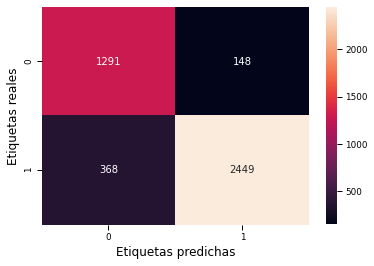

In [310]:
from sklearn.metrics import confusion_matrix

# Graficamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

## Regresion Logistica

In [311]:
# Importamos la clase
from sklearn.linear_model import LogisticRegression

In [312]:
x1 = nuevo_t2.drop(["Y"], axis=1)
x1.shape

(12895, 68)

In [313]:
#X.isnull().sum()

In [314]:
y1 =nuevo_t2.Y
y1.shape

(12895,)

In [315]:
#y.isnull().sum()

In [316]:
## Standarizamos la matriz de *features*
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)

In [317]:
# Verificamos que las variables ahora tengan media 0 y desvío 1.
print('Medias:', np.mean(x1, axis=0).round(2))
print('Desvio:', np.std(x1, axis=0).round(2))

Medias: [ 0.  0.  0. -0. -0.  0.  0. -0. -0.  0. -0. -0.  0.  0.  0.  0. -0. -0.
  0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.
  0.  0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0. -0.  0.]
Desvio: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [318]:
# Separar los conjuntos de entrenamiento y testeo, estratificando por clase
X_train, X_test, y_train, y_test = train_test_split(x1, y1,test_size=0.33)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8639, 68)
(4256, 68)
(8639,)
(4256,)


### Teniendo en cuenta el peso de las clases, podemos darle más peso a las muestras de la clase minoritaria: 
APLICANDO PENALTY
Dándole mayor peso a los elementos de la clase minoritaria se centrará en ajustarse mejor a esa clase y, de este modo, predecir mejor.</br>
Usamos L2: también conocida como Ridge, lo que hace es estimar β pequeños, sirve para controlar el sobre ajuste.

In [319]:
# Instanciamos un objeto de esa clase
lr = LogisticRegression(fit_intercept=True, penalty='l2',  C=0.8, solver='lbfgs', max_iter=75,warm_start=True)

In [320]:
# Ajustamos esta instancia con los datos de entrenamiento
lr.fit(x1,y1)

LogisticRegression(C=0.8, max_iter=75, warm_start=True)

In [321]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
print('Precision en entrenamiento:', accuracy_score(pred_train, y_train))
print('Precision en test:', accuracy_score(pred_test, y_test))

Precision en entrenamiento: 0.7052899641162171
Precision en test: 0.7093515037593985


In [322]:
lr.predict(X_test)

array([2, 2, 2, ..., 2, 2, 2])

In [323]:
lr.predict_proba(X_test).shape

(4256, 2)

Donde la columna 0 es la probabilidad de pertenencia a la clase 0 y la columna 1 es la probabilidad de pertenencia a la clase 1.

In [324]:
# cHEAQUEAMOS Sumamos el valor de cada columna para cada fila
lr.predict_proba(X_test).sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

Si nos quedamos sólamente con la columna 1, podremos hacer la comparación

In [325]:
# Nos quedamos sólamente con la columna 1
prob_1 = lr.predict_proba(X_test)[:,1]
# Comparamos con 0.5
prob_1 >= 0.5

array([ True,  True,  True, ...,  True,  True,  True])

In [326]:
# Comparamos con el método .predict()
(prob_1 >= 0.5) == lr.predict(X_test)

array([False, False, False, ..., False, False, False])

Vemos que es lo mismo para todos los casos obtener predicciones con el método `.predict()` que obtener la estimación de las probabilidades con `.predict_proba()` y luego compararlo con el valor de umbral 0.5.<br>
En la práctica a veces es necesario modificar el valor de umbral por diversos motivos, por lo que no hay que perder de vista que los clasificadores en Scikit-Learn tienen el método `.predict_proba()` que nos permite jugar manualmente con el valor de umbral. Si no es necesario modificar este valor, utilizando `.predict()` obtendremos los mismo resultados que umbralizando con 0.5.

Una vez que ya tenemos las etiquetas puestas por el modelo (es decir $\hat{y}$) debemos comparar esas predicciones con los valores reales ($y$)

In [327]:
y_pred = lr.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [328]:
y_pred.shape

(4256,)

In [329]:
# Usando Scikit-Learn
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7093515037593985

In [330]:
lr.intercept_

array([0.75141925])

In [331]:
lr.coef_

array([[ 1.06912734e-01, -3.12988468e-01, -1.15397778e-01,
        -3.30068411e-02,  1.52119793e-03,  6.22712400e-02,
        -2.83927244e-01, -4.43661951e-01, -3.73058837e-03,
        -9.16038244e-02, -2.90043311e-02, -1.29137906e-02,
         1.36514999e-02,  3.63769483e-02,  3.19595996e-02,
        -2.58017835e-02,  7.91990491e-02,  1.60367107e-01,
        -3.98345884e-02, -9.30747629e-02, -2.17685715e-01,
         8.02635101e-04, -1.01238966e-01,  5.17626468e-03,
        -1.21732600e-01, -1.75265217e-02,  7.24596005e-02,
         4.73899838e-02, -2.42374626e-02,  5.83253200e-02,
        -1.37310197e-03, -1.79086111e-02, -9.63848946e-02,
         2.76322557e-04, -4.69661144e-02,  1.28090428e-01,
         2.52383989e-02, -1.56919729e-01, -7.61271025e-02,
         7.28463599e-02,  5.77240421e-04, -1.13360469e-01,
         8.36904195e-03,  1.07968128e-01,  4.32513868e-02,
        -4.70276797e-02,  3.47213080e-02, -6.96546321e-03,
        -2.41762172e-02,  3.93053403e-02, -7.54574735e-0

In [332]:
#ARMO UNA DEF DE GRAFICOS  DE CONFUSION
def mostrar_resultados(y_test, y_pred):
    c_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(c_matrix, annot=True,linewidths=1.8,fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('Clase')
    plt.xlabel('Clase predicta')
    plt.show()
    

In [333]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.25      0.37      1417
           2       0.72      0.94      0.81      2839

    accuracy                           0.71      4256
   macro avg       0.69      0.60      0.59      4256
weighted avg       0.70      0.71      0.66      4256



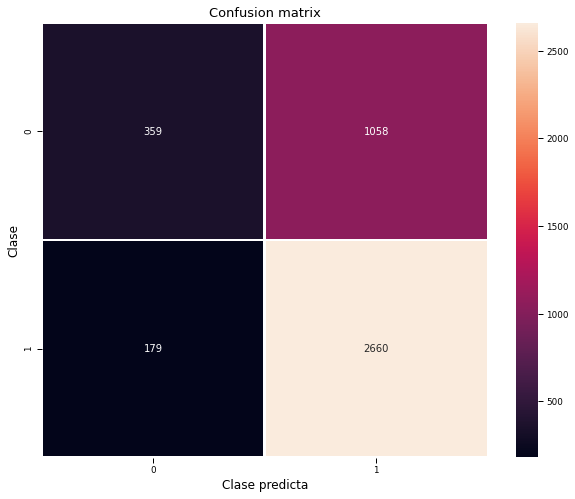

In [334]:
mostrar_resultados(y_test, y_pred)

# Naive Bayes

In [335]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [336]:
X_nb = t.drop("Y", axis = 1)
y_nb = t.Y

In [337]:
# Separar los conjuntos de entrenamiento y testeo, estratificando por clase
X_train, X_test, y_train, y_test = train_test_split(X_nb, y_nb,test_size=0.33, stratify=y_nb)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6700, 68)
(3300, 68)
(6700,)
(3300,)


In [338]:
gnb = GaussianNB() # va a examinar una continua entre 0y1
gnb.fit(X_train, y_train)

GaussianNB()

In [339]:
Ypred_nb = gnb.predict(X_test)
Ypred_nb

array([2, 2, 2, ..., 2, 2, 2])

In [340]:
# accuracy
#Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy=', accuracy_score(y_test, Ypred_nb))

Accuracy= 0.6442424242424243


In [341]:
y_nb.value_counts(1)

2    0.8583
1    0.1417
Name: Y, dtype: float64

In [342]:
# comparamos la performance del modelo con lo que obtenemos si siempre elegimos la clase mayoritaria como predicción

y_train.value_counts(1) 

2    0.858358
1    0.141642
Name: Y, dtype: float64

A todas las 2 le pego xque mi modelo nBayesiano tiene el 75%de datos con 2

In [343]:
#reviso entonces con otras metricas
print(classification_report(y_test, Ypred_nb))

              precision    recall  f1-score   support

           1       0.20      0.52      0.29       468
           2       0.89      0.66      0.76      2832

    accuracy                           0.64      3300
   macro avg       0.55      0.59      0.53      3300
weighted avg       0.80      0.64      0.70      3300



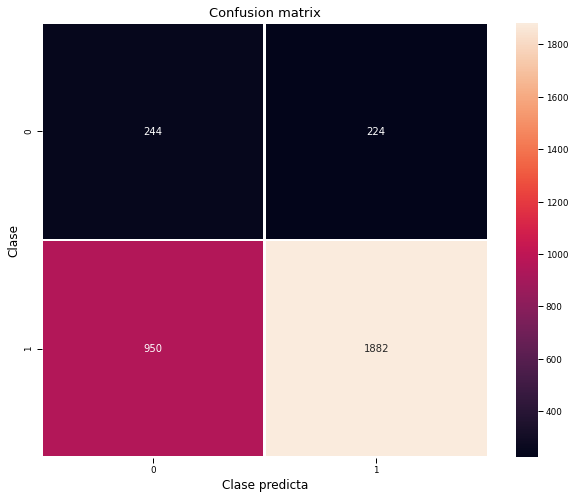

In [344]:
mostrar_resultados(y_test, Ypred_nb)

In [345]:
## ASI SERIA LO TOP, PERO NO LLEGO CON ESTE
#La clase mayoritaria es 2.
# Calculemos null_acuracy como si en test hubieramos predicho 2 para todos los registros:
tp = 0
tn = 6061
fp = 0
fn = 0.3939
null_accuracy = (tp + tn)/(tp + tn + fp + fn)
null_accuracy

0.9999350149476344